# Introdção
Criaremos nosso primeiro modelo de Machine Learning usando a API do Sector Learning. Vamos te mostrar como dividir seu conjunto de dados em treino e teste, treinar o modelo, fazer previsões e avaliar o desempenho usando métricas. Além disso, vamos explicar de forma intuitiva como funciona a regressão linear, para que você entenda o objetivo deste módulo. Vamos começar a codar nosso primeiro modelo de Machine Learning juntos!

Usaremos a biblioteca Scikit-Learn. Reforçaremos os conceitos do módulo anterior e exploraremos como essa biblioteca funciona. Vamos abordar tópicos como o que é o Scikit-Learn, qual problema vamos resolver e como criar um modelo. Durante o processo, faremos a carga de dados, engenharia de features, visualização dos dados e separação entre dados de treino e teste. Também veremos como treinar, validar o modelo e extrair métricas do treinamento.

## Biblioteca Scikit-learn
O Scikit-Learn é uma biblioteca popular para aprendizado de máquina em Python. Ele oferece uma ampla gama de ferramentas e algoritmos para tarefas como regressão, classificação, clusterização e redução de dimensionalidade. A biblioteca é conhecida por sua facilidade de uso e integração com outras bibliotecas populares, como NumPy, Pandas e Matplotlib. A documentação do Scikit-Learn é abrangente e fornece exemplos de uso para diferentes cenários e tipos de modelos. É uma escolha popular entre cientistas de dados e desenvolvedores de IA para criar modelos de aprendizado de máquina e realizar análises de dados.

# Etapas de Preparação

## 1. Descrição do Problema: Resolver um problema real usando programação.
Um laboratório de análises clínicas que deseja prever os resultados de exames de diabetes com base em características dos pacientes, como idade, peso e altura. Para isso, vamos coletar dados de exames já realizados, onde temos as características dos pacientes e os resultados obtidos (Positivo ou Negativo para Diabetes). Com esses dados, podemos treinar um algoritmo supervisionado para criar um modelo preditivo, com isso, poderemos usar esse modelo para prever os resultados de novos pacientes.

## 2. Importando as Bibliotecas
Instalaremos algumas bibliotecas, como o Matplotlib e o Seaborn, que serão úteis para a exploração inicial dos dados. O Seaborn é uma biblioteca de visualização de dados que oferece gráficos mais modernos e interessantes. Vamos utilizar essas bibliotecas para carregar os dados, entender sua estrutura e começar a criar nosso modelo. É importante ressaltar que o conjunto de dados utilizado foi criado de forma aleatória, não sendo um conjunto de dados controlado disponível na internet. No mundo real, nem sempre é possível encontrar correlações claras entre as variáveis independentes e a variável alvo. Porém, como cientistas de dados, temos ferramentas e técnicas para extrair novas features e abordagens a fim de encontrar essas relações e fazer previsões mais assertivas. Vamos explorar diferentes formas de visualização dos dados utilizando o Seaborn, que é uma biblioteca gráfica alternativa ao Matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

## 3. Estruturar o Conjunto de dados

### Carregar Dados
- Começar a analisar o conjunto de dados que iremos trabalhar. O conjunto de dados contém informações sobre exames médicos de pacientes, como ID do paciente, gênero, idade, peso, altura e resultado do exame de diabetes. Utilizamos as bibliotecas pandas, matplotlib e Seaborn para carregar e visualizar os dados. 
- Criar um Jupyter Notebook chamado "modelo-diabetes.ipynb" e importar as bibliotecas necessárias. 
- Carregamos o arquivo de dados em um dataframe e visualizar sua estrutura usando o método "info()".

In [3]:
# Carregar o dataset para o DataFrame
df_exames = pd.read_csv('exame_diabetes.csv')
df_exames.head(2)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82


In [8]:
# Visualizar Estrutura 
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   idade      100 non-null    int64
 1   peso       100 non-null    int64
 2   altura     100 non-null    int64
 3   resultado  100 non-null    int64
 4   genero_F   100 non-null    int64
 5   genero_M   100 non-null    int64
dtypes: int64(6)
memory usage: 4.8 KB


### Transformar Features
- Discutir sobre a importância de converter variáveis categóricas em numéricas para utilizá-las em modelos de regressão. 
- Explicar que a abordagem de substituição direta de valores pode levar a pesos diferentes nas informações e apresentar o conceito de One-Hot Encoding. 
- Mostrar como usar o método get_dummies do pandas para realizar essa conversão.
- Criar variáveis binárias que representam as categorias. 
- Importância de remover colunas irrelevantes, como a coluna de identificação do paciente.

In [5]:
# Remover coluna irrelevante (id_cliente)
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)
df_exames.head(2)

,genero,idade,peso,altura,resultado
0,M,46,83,165,98
1,F,23,83,164,82


### 3.2.1 - Converter a variável categória (binária) em número.
O problema em converter uma variável <u>qualitativa nominal</u> genero (M ou F) em (1 ou 0) por exemplo, pode fazer com que o modelo atribua pesos a variável (0 < 1).
<p>Uma das formas  para lidar com isso é utilizando o One-Hot Enconding, que transforma uma variável em duas diferentes: genero (genero_M e genero_F), recebendo os vaores 0-Não e 1-Sim.


In [7]:
# Converter variável categórica (genero) em numérica usando One-Hot Encoding, convertendo os valores booleanos em números.
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')
df_exames.head(2)

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0


## 3.3 - Visualização de Dados
- Usar a biblioteca Seaborn para visualizar a correlação entre as variáveis de um dataset. 
- Utilizar o método heatmap para criar um mapa de calor com a matriz de correlação das variáveis. 
- Adicionar anotações aos valores da matriz para facilitar a visualização das correlações. 
- Definir os limites mínimo e máximo da escala do mapa de calor. 
- Explorar o uso do método scatter_matrix do Pandas para criar um gráfico de dispersão com correlação entre as variáveis. 
- Possibilidade de personalizar a escala de cores dos gráficos.

<Axes: >

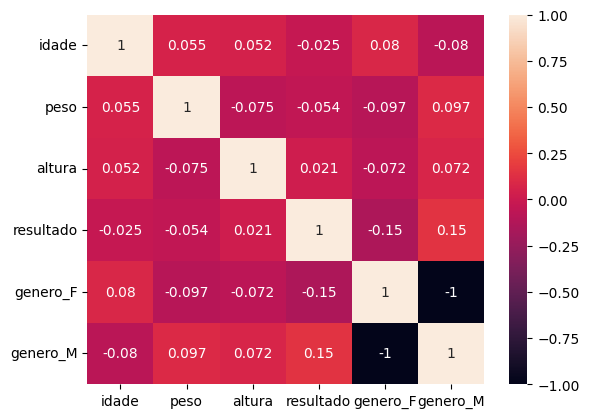

In [9]:
# Mapa de Calor com Correlação entre as variáveis
sns.heatmap(df_exames.corr(), vmin=-1, vmax=1,  annot=True)

<Axes: >

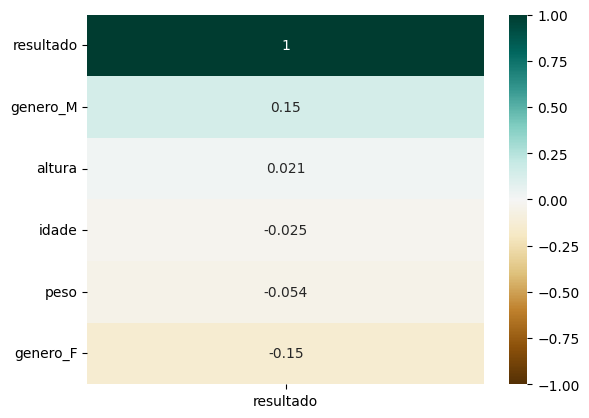

In [11]:
# Mapa de Calor com Correlação só com a variável target (resultado)
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1, vmax=1,  annot=True, cmap='BrBG')

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,


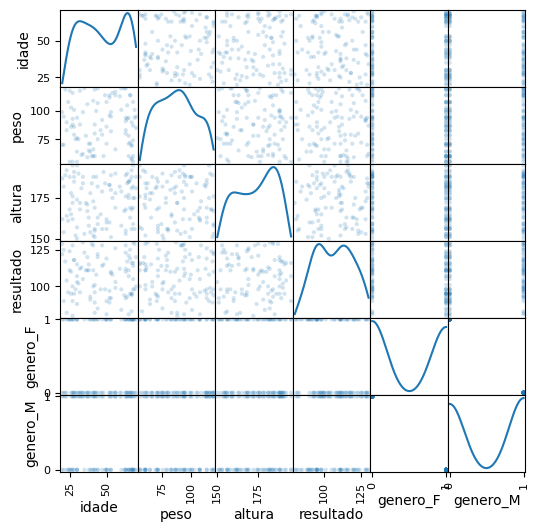

In [12]:
# Plot de Scatter (Dispersão) com Distribuição no gráfico
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6,6), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>],
       [<Axes: title={'center': 'resultado'}>,
        <Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>]], dtype=object)

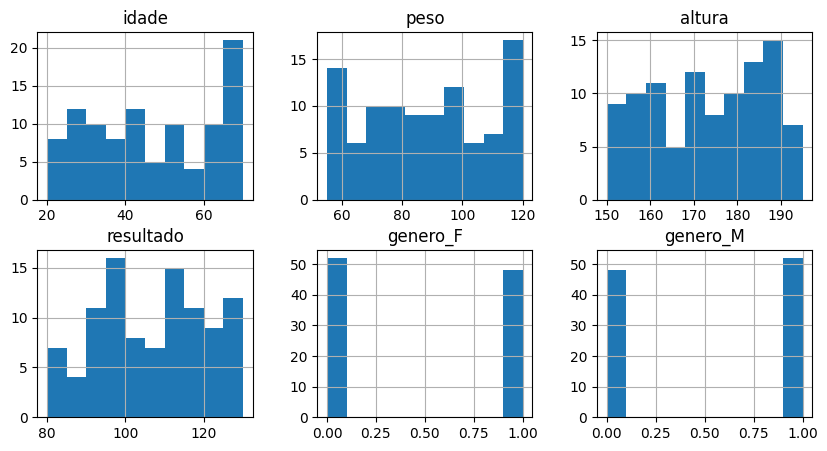

In [13]:
# Histograma de todas as variáveis
df_exames.hist(layout=(2,3), figsize=(10,5))

## 3.4 - Criação de Features
- Importância da engenharia de features na criação de modelos de machine learning. 
- Explor a possibilidade de criar uma nova feature chamada IMC (Índice de Massa Corporal) com base nas variáveis de peso e altura. 
- Analisar os gráficos de correlação e histograma para verificar se o IMC possui alguma relação com a variável target. 
- Concluíremos que, apesar do IMC ter correlações com peso e altura, sua correlação com o resultado é fraca. 
- No entanto, aprenderemos a importância da engenharia de features e como criar novas variáveis para melhorar nossos modelos.

In [10]:
df_exames.columns

Index(['idade', 'peso', 'altura', 'resultado', 'genero_F', 'genero_M'], dtype='object')

### 3.4.1 - Criar uma feature nova: IMC (Índice de Massa Corporal)
IMC = peso(kg)/altura(mt)^2

In [14]:
df_exames['imc'] = round(df_exames['peso']/(df_exames['altura']/100)**2, 2)
df_exames.head()

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.49
1,23,83,164,82,1,0,30.86
2,39,71,154,93,0,1,29.94
3,26,103,165,95,1,0,37.83
4,27,55,176,100,0,1,17.76


<Axes: >

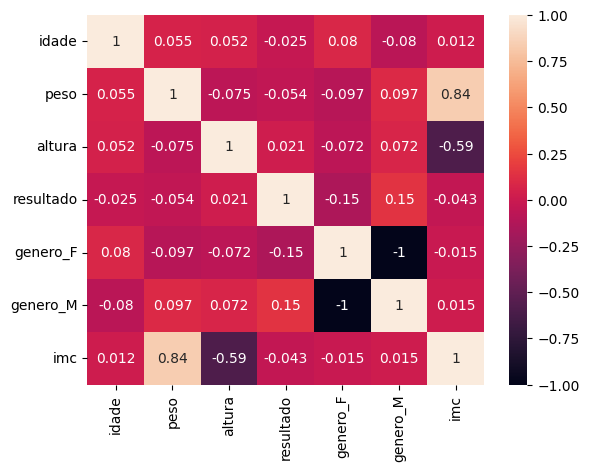

In [15]:
# Mapa de Calor com Correlação entre as variáveis
sns.heatmap(df_exames.corr(), vmin=-1, vmax=1,  annot=True)

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>,
        <Axes: title={'center': 'imc'}>, <Axes: >]], dtype=object)

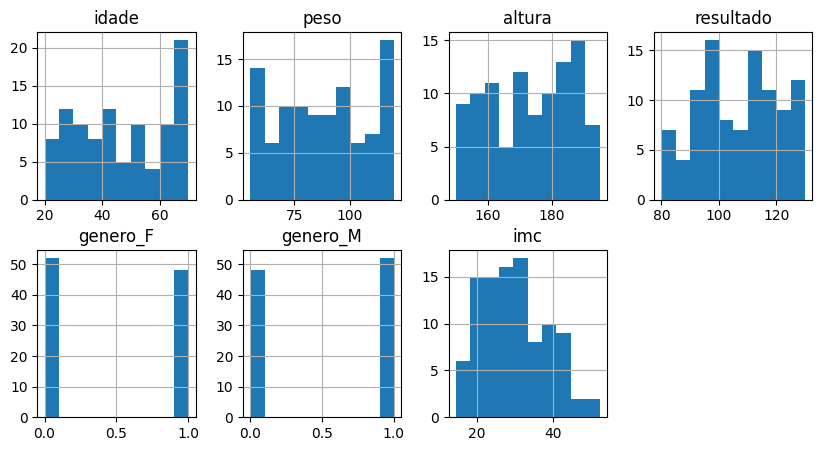

In [16]:
# Histograma de todas as variáveis
df_exames.hist(layout=(2,4), figsize=(10,5))

<Axes: >

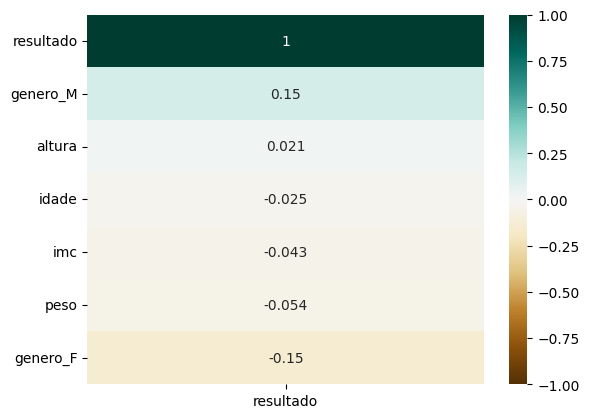

In [17]:
# Mapa de Calor com Correlação só com a variável target (resultado)
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1, vmax=1,  annot=True, cmap='BrBG')

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>,
        <Axes: xlabel='imc', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>,
        <Axes: xlabel='imc', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>,
        <Axes

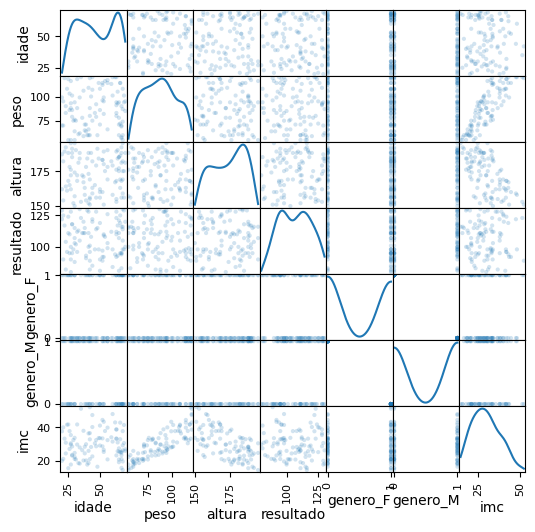

In [18]:
# Plot de Scatter (Dispersão) com Distribuição no gráfico
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6,6), diagonal='kde')

# 4 - Treinamento dos Modelos
Vamos aprender sobre <u>regressão linear</u> utilizando o Seaborn. O Seaborn possui um plot específico para gerar uma regressão. Podemos especificar o DataFrame que queremos utilizar, a variável independente (eixo x) e a variável dependente (eixo y). O Seaborn irá gerar um plot com os pontos e uma reta que representa a regressão. Essa reta é calculada de forma a passar o mais próximo possível dos pontos. Através dessa reta, podemos prever o valor da variável dependente para novos valores da variável independente. Vamos utilizar um exemplo simples com um DataFrame contendo o tempo de casa e o salário de funcionários para ilustrar graficamente a regressão.

## 4.1 - Exemplo de Regressão Linear Simples
Antes de começar segue exemplo de regressão linear simples, para termos uma intuição sobre.

<img src='https://cdn-images-1.medium.com/max/640/1*eeIvlwkMNG1wSmj3FR6M2g.gif'>

In [19]:
# Exemplo simples pra demonstrar gráficamente
dict_regressao = {'tempo_casa': [1, 3, 6, 9, 10, 14, 18], 'salario': [1500, 3000, 4500, 6000, 7000, 8500, 10000]}
df_regressao_simples = pd.DataFrame.from_dict(dict_regressao)
df_regressao_simples

,tempo_casa,salario
0,1,1500
1,3,3000
2,6,4500
3,9,6000
4,10,7000
5,14,8500
6,18,10000


<Axes: xlabel='tempo_casa', ylabel='salario'>

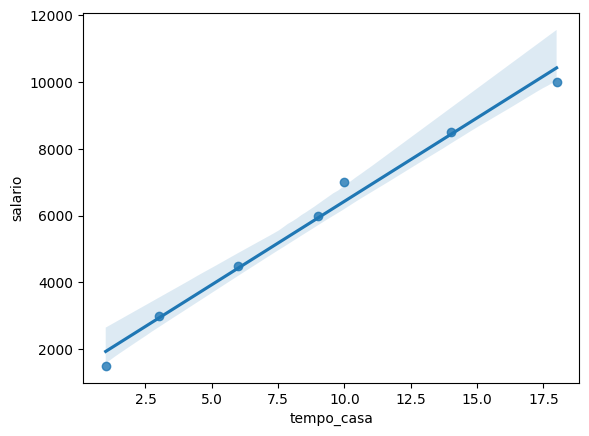

In [20]:
sns.regplot(data=df_regressao_simples, x='tempo_casa', y='salario')

## 4.2 - Divisão do Dataset entre Treino e Teste
Regressão linear simples no contexto do modelo de diabetes. 
- Importar as bibliotecas necessárias do scikit-learn, como a biblioteca de regressão linear, a função para dividir o conjunto de dados em treino e teste e as métricas para validar nosso modelo, como o erro absoluto mínimo e o r2score. 
- Preparar os dados para criar dois modelos: um sem o IMC e outro apenas com o IMC. 
- Dividir os dados em variáveis dependentes (target) e independentes (explicativas) e removemos as colunas desnecessárias. 
- Dividir o conjunto de dados em treino e teste, usando 70% para treinamento e 30% para teste. Essa divisão é aleatória, mas podemos controlá-la usando o argumento random state. 
- Por fim, criar quatro conjuntos de dados: xtrain, xtest, ytrain e ytest. Assim estará pronto para alimentar nosso modelo de machine learning.

<p>Existem várias literaturas que pra conjuntos grandes, talvez consiga usar (Treino:50% Teste:50%) ou (Treino:60% Teste:40%). Pra conjuntos menores (Treino:70% Teste:30%). Pode usar outros tipos de split como k-fold.

In [21]:
df_exames.head(2)

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.49
1,23,83,164,82,1,0,30.86


In [22]:
X = df_exames.drop(columns=['resultado', 'imc'])
y = df_exames['resultado']

In [23]:
# Retorna 4 conjunto de dados 70% X_train, 70% X_test, 30% y_train, 30% y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1010)

## 4.3 - Treinamento do modelo 1 (Sem IMC - Regressão Linear Múltipla )
Neste vídeo, aprendemos sobre o treinamento de modelos de regressão linear usando o Scikit-Learn. O treinamento envolve fornecer ao modelo os dados de treinamento, que consistem nas variáveis independentes (X) e na variável dependente (Y). O modelo usa um algoritmo de regressão linear para encontrar um padrão entre as variáveis em X e a variável Y. Em seguida, geramos previsões usando o conjunto de testes e comparamos essas previsões com os dados reais. Também podemos obter os coeficientes da equação da reta gerada pelo modelo.

In [24]:
# Treinar algoritmo de Regressão Linear - Modelo 1
model_1 = LinearRegression().fit(X_train, y_train)

In [25]:
# Gerar predições do conjunto de testes com base no modelo. Dessa forma é feita uma comparação da previsão do modelo x dados reais.
# Ou seja, use o conjunto de testes (X_test), pra fazer uma previsão.
y_pred = model_1.predict(X_test)
y_pred

array([110.05530578, 109.82761135, 102.6334068 , 108.4731905 ,
       109.40362776, 103.62716001, 108.39015432, 108.3414436 ,
       101.25062464, 109.95966604, 101.37713126, 109.2059948 ,
       108.34762037, 109.44590975, 110.89539844, 103.6047473 ,
       103.13754231, 108.27762616, 108.96177751, 108.47250402,
       101.21692741, 108.42125035, 109.27501416, 103.2297599 ,
       102.50184925, 109.48456131, 101.44716285, 109.19433112,
       107.56423139, 100.86450565])

In [26]:
# Equação da reta - Regressão Linear: **y = ax + b**
model_1.coef_ # a

array([ 0.02231804, -0.037082  , -0.00642583, -3.49991336,  3.49991336])

In [27]:
model_1.intercept_ # b

109.01627908785439

## 4.4 - Métricas do modelo 1 - Sem IMC (Regressão Linear Múltipla )
Nesta aula, discutimos a avaliação de um modelo de regressão linear. Começamos explorando duas métricas importantes: o r2Score e o Mean Absolute Error (MAE). O r2Score mede o quão bem o modelo explica a variação dos dados, com valores mais próximos de 1 indicando um bom ajuste. Já o MAE calcula a diferença média entre os valores reais e os valores previstos pelo modelo. No exemplo apresentado, o primeiro modelo teve um baixo r2Score e um MAE considerável, indicando um ajuste insatisfatório. Agora, vamos comparar esses resultados com um segundo modelo.

### 4.4.1 - R2 Score: Duas formas
- A quem vem dentro do modelo onde conseguimos calcular o R2Score do treino também.
- A outra é usando a função do sklearn r2_score(y_test, y_pred) obtendo o R2 Score do valor real <u>y_test</u> com o predito pelo modelo <u>y_pred</u>

In [28]:
# R2 Score - Conjunto de Treinamento
model_1.score(X_train, y_train)

0.06032553172625321

In [29]:
# R2 Score - Conjunto de Testes
model_1.score(X_test, y_test)

-0.15442777036527278

In [30]:
# Segunda forma usando o scikit-learn:  R2 Score - Obtendo o R2 Score do valor real y_test com o predito pelo modelo y_pred
r2_score(y_test, y_pred)

-0.15442777036527278

### 4.4.2 - MAE (Mean Absolute Error)

In [31]:
# O resultado da Hemoglobina(Da diabetes) é expresso em miligramas por decilitros, onde > 99 mg/dL(pré-diabetes)
# O resultado diz que o MAE, nesse conjunto de testes é 11.77 mg/dL pra mais ou pra menos, ou seja
# Esse tamanho do erro foi insatisfatório, porque é um número alto dentro da escala desse exame.
mean_absolute_error(y_test, y_pred)

11.770480698552213

## 4.5 - Treinar e validar modelo 2 - Apenas IMC (Regressão Linear Simples) - Treinamento e Validação
Faremos uma comparação entre dois modelos de regressão linear. 
- 1º modelo é uma regressão linear múltipla, onde todas as variáveis são consideradas, exceto o IMC. 
- 2º modelo é uma regressão linear simples, onde apenas o IMC é considerado. 
- Analisaremos as métricas de desempenho, como o r2Score e o erro quadrático mínimo, para avaliar a eficácia de cada modelo. 
- Mostraremos visualmente as retas de regressão e os resíduos para entender melhor a capacidade de previsão de cada modelo. 
- Concluíremos que o segundo modelo, com apenas o IMC como variável, teve um desempenho ligeiramente melhor, mas ainda há espaço para melhorias.

### 4.5.1 - Divisão do Dataset entre Treino e Teste

In [32]:
X = pd.DataFrame(df_exames['imc'])
y = df_exames['resultado']

In [33]:
# Retorna 4 conjunto de dados 70% X_train, 70% X_test, 30% y_train, 30% y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1010)

### 4.5.2 - Treinamento do Modelo 2

In [34]:
# Treinar algoritmo de Regressão Linear
model_2 = LinearRegression().fit(X_train, y_train)

In [35]:
# Gerar predições do conjunto de testes com base no modelo. Dessa forma é feita uma comparação da previsão do modelo x dados reais.
# Ou seja, use o conjunto de testes (X_test), pra fazer uma previsão.
y_pred = model_2.predict(X_test)
y_pred

array([106.02857769, 106.12009033, 105.30820895, 105.21141673,
       105.23077517, 106.28962337, 104.39249591, 104.9398119 ,
       104.99964709, 105.25893291, 104.68815214, 105.99338052,
       105.25072023, 105.4120406 , 105.83851297, 106.0889995 ,
       105.90362774, 105.07590762, 105.65196797, 104.86237813,
       104.99319427, 104.60015921, 105.70124401, 105.688925  ,
       105.72764189, 105.28415755, 105.76225244, 105.06358861,
       105.42259975, 104.20536429])

In [36]:
# Equação da reta - Regressão Linear: **y = ax + b**
model_2.coef_ # a

array([-0.05866195])

In [37]:
model_2.intercept_ # b

107.21237583542793

### 4.5.3 - Métrica Modelo 2: R2 Score

In [38]:
# R2 Score - Conjunto de Treinamento
model_2.score(X_train, y_train)

0.0011687598659028131

In [39]:
# R2 Score - Conjunto de Testes
model_2.score(X_test, y_test)

-0.04359514006039911

In [40]:
# Segunda forma usando o scikit-learn:  R2 Score - Obtendo o R2 Score do valor real y_test com o predito pelo modelo y_pred
r2_score(y_test, y_pred)

-0.04359514006039911

### 4.5.3 - Métrica Modelo 2: MAE(Mean Absolute Error)

In [41]:
# MAE
mean_absolute_error(y_test, y_pred)

11.18403594028847

## 4.6 - Mostrar o Resultado da Reta
Não há um padrão, porque visualmente olhando, os valores estão bem espalhados.

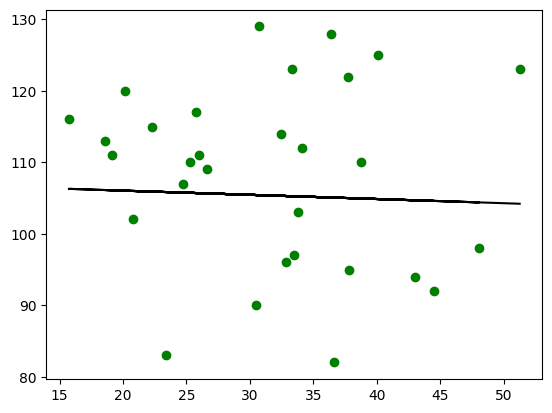

In [42]:
# Eixo X: imc e Y: Resultado
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test, y_pred, color='k') # mostrar a reta calculada na regressão